![upc_logo.png](attachment:upc_logo.png)

<h3 align="center">Inteligencia Artificial - WS7A</h3> 

### Predicción de precipitación, temperatura máxima y mínima en la zona de Pisac, Cusco.

#### 1. Importar las librerías necesarias

In [41]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 2. Inicializar datos para entrenamiento

Cargamos datos historicos de la meteorología en Pisac, Cusco. Desde 1963 hasta 2014 es la data disponible.

In [42]:
dataP = pd.read_excel("DataMeteoEstacionPisac.xlsx", names = ["ano","mes","dia","precipitacion","max_temp","min_temp"])

In [43]:
dataP

,ano,mes,dia,precipitacion,max_temp,min_temp
0,1963,12,2,0.0,-99.9,-99.9
1,1963,12,3,0.0,-99.9,-99.9
2,1963,12,4,0.0,-99.9,-99.9
3,1963,12,5,0.0,-99.9,-99.9
4,1963,12,6,0.0,-99.9,-99.9
...,...,...,...,...,...,...
18469,2014,6,26,0.0,26.2,4.0
18470,2014,6,27,0.0,24.5,7.0
18471,2014,6,28,0.0,21.2,4.6
18472,2014,6,29,0.0,26.0,5.4


Los valores que son igual a -99.9 significan que no hay información disponible. Por lo tanto seran limpiados.

In [44]:
dataP = dataP[dataP.max_temp != -99.9]
dataP = dataP[dataP.min_temp != -99.9]
dataP = dataP[dataP.precipitacion != -99.9]
#data = data[data.ano >= 2000]

In [45]:
dataP

,ano,mes,dia,precipitacion,max_temp,min_temp
12143,1997,3,1,1.8,22.4,10.3
12144,1997,3,2,1.4,21.4,10.2
12145,1997,3,3,4.2,23.1,9.0
12146,1997,3,4,4.1,16.4,9.1
12147,1997,3,5,5.5,18.2,10.0
...,...,...,...,...,...,...
18469,2014,6,26,0.0,26.2,4.0
18470,2014,6,27,0.0,24.5,7.0
18471,2014,6,28,0.0,21.2,4.6
18472,2014,6,29,0.0,26.0,5.4


In [46]:
dataP.describe()

,ano,mes,dia,precipitacion,max_temp,min_temp
count,6301.000000,6301.000000,6301.000000,6301.000000,6301.000000,6301.000000
mean,2005.362641,6.486272,15.730678,1.685415,22.729630,8.038407
std,5.007619,3.438440,8.801370,4.036328,2.611351,2.734598
min,1997.000000,1.000000,1.000000,0.000000,10.900000,-2.500000
25%,2001.000000,4.000000,8.000000,0.000000,21.100000,6.000000
50%,2005.000000,6.000000,16.000000,0.000000,23.000000,8.700000
75%,2010.000000,9.000000,23.000000,1.200000,24.600000,10.200000
max,2014.000000,12.000000,31.000000,39.200000,30.600000,14.100000


In [47]:
##### DATOS DE PISAC
count_rowP = dataP.shape[0]
fechas1 = [[dataP.iloc[i]['ano'],dataP.iloc[i]['mes'],dataP.iloc[i]['dia']]for i in range(count_rowP)]
anoArr1 = [i[0] for i in fechas1]
mesArr1 = [i[1] for i in fechas1]
diaArr1 = [i[2] for i in fechas1]
meteo1 = [[dataP.iloc[i]['precipitacion'],dataP.iloc[i]['max_temp'],dataP.iloc[i]['min_temp']]for i in range(count_rowP)]
precArr1 = [i[0] for i in meteo1]
maxArr1 = [i[1] for i in meteo1]
minArr1 = [i[2] for i in meteo1]

In [48]:
fechas1 = np.array(fechas1, dtype = float)
meteo1 = np.array(meteo1, dtype = float)
anoArr1 = np.array(anoArr1, dtype = int)
mesArr1 = np.array(mesArr1, dtype = int)
diaArr1 = np.array(diaArr1, dtype = int)
precArr1 = np.array(precArr1, dtype = float)
maxArr1 = np.array(maxArr1, dtype = float)
minArr1 = np.array(minArr1, dtype = float)

#### 3. Definir la estructura de la red y crear el modelo

La red estará compuesta múltiples capas para cada entrada. Habra una capa oculta seguida de una de concatenamiento con las otras entradas. Por último, una capa mas previa a la salida.

In [49]:
# entradas
ano = tf.keras.Input(shape = [1,])
mes = tf.keras.Input(shape = [1,])
dia = tf.keras.Input(shape = [1,])

# primera capa
aLayer = tf.keras.layers.Dense(12)(ano)
mLayer = tf.keras.layers.Dense(12)(mes)
dLayer = tf.keras.layers.Dense(12)(dia)

# capa de concatenado
p = tf.keras.layers.concatenate([mLayer,dLayer])
cma = tf.keras.layers.concatenate([aLayer,mLayer,dLayer])
cmi = tf.keras.layers.concatenate([aLayer,mLayer,dLayer])

# tercera capa
postp = tf.keras.layers.Dense(12, activation='sigmoid')(p)
postm = tf.keras.layers.Dense(12)(cma)
postd = tf.keras.layers.Dense(12)(cmi)

# salida
salida1 = tf.keras.layers.Dense(units=1)(postp)
salida2 = tf.keras.layers.Dense(units=1)(postm)
salida3 = tf.keras.layers.Dense(units=1)(postd)

model = tf.keras.Model(inputs = [ano, mes, dia], outputs = [salida1, salida2, salida3], name = 'prueba')

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)
model.summary()

Model: "prueba"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 12)           24          input_8[0][0]                    
_____________________________________________________________________________________________

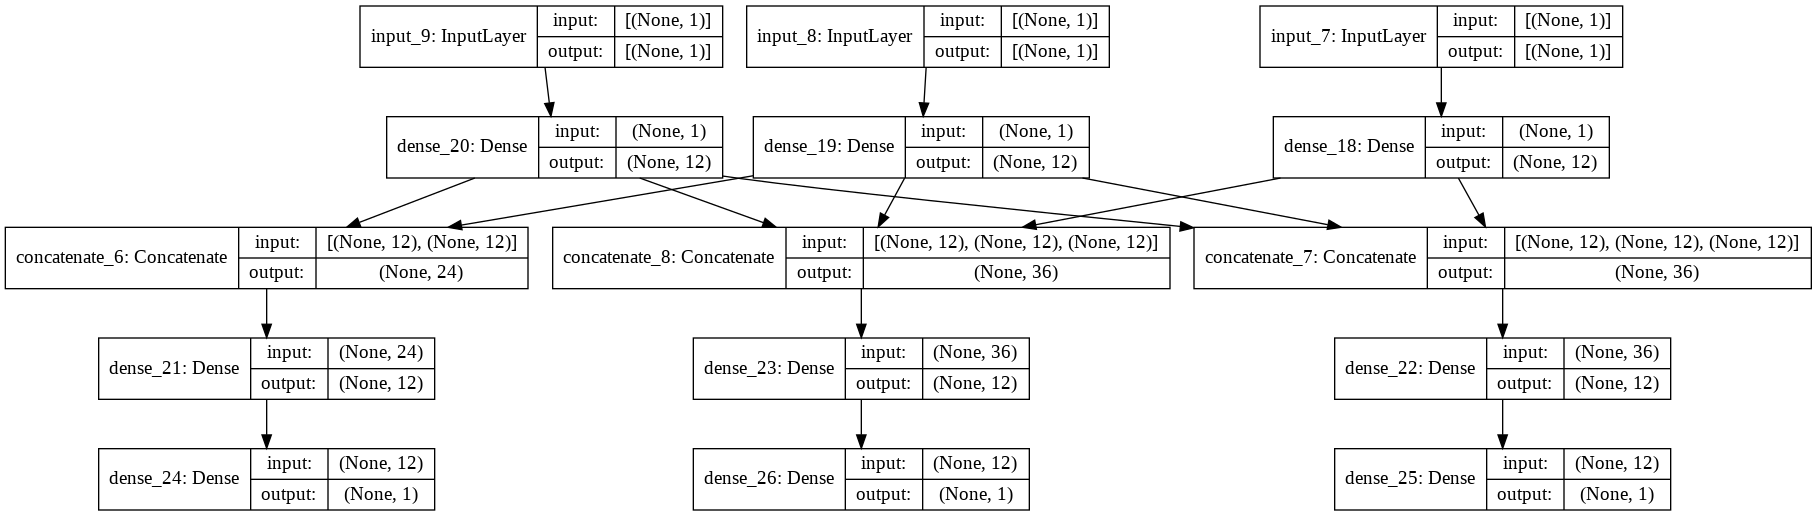

In [50]:
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### 4. Entrenar el modelo

Ejecutamos el entrenamiento de la red (aprendizaje automático) mediante la funcion **fit del modelo** creado
(las epocas o epochs son la cantidad de iteracciones de entrenamiento).

In [51]:
print("Comenzando entrenamiento...")
historial = model.fit([anoArr1,mesArr1,diaArr1], [precArr1,maxArr1,minArr1], epochs=30, verbose=True)
print("Modelo entrenado!")

Comenzando entrenamiento...
Epoch 1/30
197/197 [==============================] - 1s 2ms/step - loss: 88260.8516 - dense_24_loss: 15.8286 - dense_25_loss: 41101.9805 - dense_26_loss: 47143.0117
Epoch 2/30
197/197 [==============================] - 0s 2ms/step - loss: 31.1310 - dense_24_loss: 15.3149 - dense_25_loss: 7.0463 - dense_26_loss: 8.7698
Epoch 3/30
197/197 [==============================] - 0s 2ms/step - loss: 29.8890 - dense_24_loss: 15.0238 - dense_25_loss: 6.9100 - dense_26_loss: 7.9552
Epoch 4/30
197/197 [==============================] - 0s 2ms/step - loss: 29.4208 - dense_24_loss: 14.9520 - dense_25_loss: 6.7368 - dense_26_loss: 7.7320
Epoch 5/30
197/197 [==============================] - 0s 2ms/step - loss: 29.8974 - dense_24_loss: 15.1933 - dense_25_loss: 7.0362 - dense_26_loss: 7.6680
Epoch 6/30
197/197 [==============================] - 0s 2ms/step - loss: 29.9246 - dense_24_loss: 15.1702 - dense_25_loss: 7.0655 - dense_26_loss: 7.6889
Epoch 7/30
197/197 [===========

#### 5. Visualización gráfica del entrenamiento

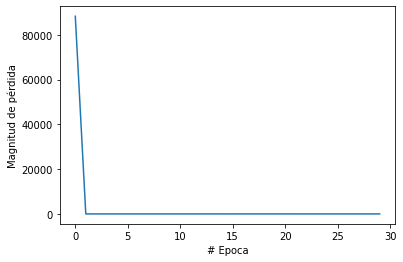

In [52]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

#### 6. Realizar una predicción

Una vez entrenada la red neuronal podemos probar el modelo y verificar que tanto aprendió.

In [53]:
print("Hagamos una predicción!")
inp = np.array([[2022.0], [1.0], [1.0]])
resultado = model.predict([inp[0],inp[1],inp[2]])
print("Pronostico para el " + str(int(inp[2])) + "/" + str(int(inp[1])) + "/" + str(int(inp[0])))
print("El resultado es: \n" 
      "Precipitacion Potencial: "+ str(resultado[0][0][0])+
      "\nTemperatura Maxima: " + str(resultado[1][0][0])+
      "\nTemperaturan Minima: " + str(resultado[2][0][0]))

Hagamos una predicción!
Pronostico para el 1/1/2022
El resultado es: 
Precipitacion Potencial: 3.1803226
Temperatura Maxima: 21.668364
Temperaturan Minima: 8.082115


In [54]:
#@title Siete dias
an =  2021#@param {type:"integer"}
me =  12#@param {type:"integer"}
di =  23#@param {type:"integer"}
a = float(an)
m = float(me)
d = float(di)

res = []
dates = []
for i in range(7):
    if d == 32:
        d = 1
        m += 1
    inp = np.array([[a],[m],[d]])
    res.append(model.predict([inp[0],inp[1],inp[2]]))
    dates.append((m, d))
    d += 1

#print("El resultado es: \n" 
for i in range(7):
    print("Pronostico para el " + str(int(dates[i][1])) + "/" + str(int(dates[i][0])) + "/" + str(int(inp[0])) + "\n"
      "Precipitacion Potencial : "+ str(res[i][0][0][0])+
      "\nTemperatura Maxima: " + str(res[i][1][0][0])+
      "\nTemperaturan Minima: " + str(res[i][2][0][0]))
    
    print("")

Pronostico para el 23/12/2021
Precipitacion Potencial : 1.5671446
Temperatura Maxima: 23.90068
Temperaturan Minima: 7.941647

Pronostico para el 24/12/2021
Precipitacion Potencial : 1.5361571
Temperatura Maxima: 23.90002
Temperaturan Minima: 7.954312

Pronostico para el 25/12/2021
Precipitacion Potencial : 1.4046626
Temperatura Maxima: 23.899364
Temperaturan Minima: 7.9669776

Pronostico para el 26/12/2021
Precipitacion Potencial : 1.2377713
Temperatura Maxima: 23.898703
Temperaturan Minima: 7.979644

Pronostico para el 27/12/2021
Precipitacion Potencial : 1.1844764
Temperatura Maxima: 23.898046
Temperaturan Minima: 7.992308

Pronostico para el 28/12/2021
Precipitacion Potencial : 1.1757479
Temperatura Maxima: 23.897387
Temperaturan Minima: 8.0049715

Pronostico para el 29/12/2021
Precipitacion Potencial : 1.1745105
Temperatura Maxima: 23.896725
Temperaturan Minima: 8.017639



In [60]:
#@title Quincenas de todo un año
year =  2021#@param {type:"integer"}
a = float(year)
m = np.arange(12)
m = [i+1 for i in m]

res = []
dates = []
for i in range(12):
    inp = np.array([[a],[m[i]],[15]])
    res.append(model.predict([[inp[0]],[inp[1]],[inp[2]]]))

#print("El resultado es: \n" 
for i in range(12):
    print("Pronostico para el " + str(15) + "/" + str(i+1) + "\n"
      "Precipitacion Potencial: "+ str(res[i][0][0][0])+
      "\nTemperatura Maxima: " + str(res[i][1][0][0])+
      "\nTemperaturan Minima: " + str(res[i][2][0][0]))
    
    print("")

Pronostico para el 15/1
Precipitacion Potencial: 4.258894
Temperatura Maxima: 21.64808
Temperaturan Minima: 8.25563

Pronostico para el 15/2
Precipitacion Potencial: 4.292432
Temperatura Maxima: 21.853342
Temperaturan Minima: 8.21788

Pronostico para el 15/3
Precipitacion Potencial: 4.5679026
Temperatura Maxima: 22.058603
Temperaturan Minima: 8.180121

Pronostico para el 15/4
Precipitacion Potencial: 1.6496811
Temperatura Maxima: 22.263866
Temperaturan Minima: 8.142369

Pronostico para el 15/5
Precipitacion Potencial: 1.1743116
Temperatura Maxima: 22.469126
Temperaturan Minima: 8.104615

Pronostico para el 15/6
Precipitacion Potencial: 1.1743116
Temperatura Maxima: 22.674383
Temperaturan Minima: 8.066859

Pronostico para el 15/7
Precipitacion Potencial: 1.1743116
Temperatura Maxima: 22.879646
Temperaturan Minima: 8.029102

Pronostico para el 15/8
Precipitacion Potencial: 1.1744018
Temperatura Maxima: 23.084908
Temperaturan Minima: 7.991351

Pronostico para el 15/9
Precipitacion Potenci

# Conversion para su uso en Javascript y HTML

In [61]:
#Exportar el modelo en formato h5
model.save('clima_pisac.h5')

In [57]:
#Para convertirlo a tensorflow.js, primero debemos instalar la libreria
!pip install tensorflowjs

In [62]:
#Crear carpeta donde se colocaran los archivos resultantes
!rmdir carpeta_out
!mkdir carpeta_out

rmdir: failed to remove 'carpeta_out': Directory not empty
mkdir: cannot create directory ‘carpeta_out’: File exists


In [63]:
#Realizar la exportacion a la carpeta de salida
!tensorflowjs_converter --input_format keras clima_pisac.h5 carpeta_out